In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

columns = {"Start time":"start", "Completion time":"end", "Age":"age","Residency":"residency",
          "What is your level of hearing loss?":"hearing_loss", "What assistive technology do you use?":"tech",
          "Which environments would you use these technologies? ":"environments",
           "How much do you spend on these technologies?":"cost", 
           "Do you receive any external funds for these technologies (e.g. NHS)?":"funds",
          "How satisfied are you with the current pricing?":"satisfaction",
          "What features do you expect in assistive technology?":"features",
          "Have you ever been in an accident whilst using assistive technology?":"accident",
          "If you answered yes to the previous question -  could you provide a concise description (one or two sentences) of the accident's cause and whether any preventive measures that could have been taken?":"accident_comment",
          "Based on the provided description, what are your thoughts on this product? Does it seem useful? What else could it do?":"project"
          }

mapping = {
    'No hearing loss': 'No hearing loss',
    'Minor hearing loss': 'Mild hearing loss',
    'Major hearing loss': 'Moderate hearing loss',
    'Completely deaf': 'Profound hearing loss'
}

df = pd.read_csv('../raw/data-1.csv')
df_clean = df
df_clean.rename(columns=columns, inplace=True)
df_clean = df_clean.drop(['Name'], axis=1)
df_clean = df_clean.drop(['Email'], axis=1)
df_clean = df_clean.drop(['Last modified time'], axis=1)
df_clean["hearing_loss"] = df_clean["hearing_loss"].str.strip()
df_clean["hearing_loss"] = df_clean["hearing_loss"].replace(mapping)
df_clean.head()

,ID,start,end,age,residency,hearing_loss,tech,environments,cost,funds,satisfaction,features,accident,accident_comment,project
0,1,11/7/23 17:38:51,11/7/23 17:42:14,45-54,"Bristol, UK",Profound hearing loss,Cochlear implant;Speech-to-text;microphone blu...,Social situations;One-on-one interactions;Publ...,"£500 - £1,000",NaN,2,Clear sound. Accurate speech to text technology,No,NaN,Does sound useful but I would want to have it ...
1,2,11/7/23 17:49:37,11/7/23 17:53:47,35-44,"Bristol, uk",Moderate hearing loss,"Hearing aid;Speech-to-text;Roger On, Roger tou...",Social situations;One-on-one interactions;Publ...,"> £1,000",NaN,3,"Ease of use, good connectivity",No,NaN,"Initially sounds good, how would it work along..."
2,3,11/7/23 18:17:25,11/7/23 18:19:49,55-64,Reading berkshire,Profound hearing loss,Mobile to use notes for communication ;,One-on-one interactions;,"> £1,000",NaN,1,Should apply discount or no VAT for deaf peopl...,No,NaN,Campaign for no VAT for deaf people to purchas...
3,4,11/7/23 18:33:01,11/7/23 18:36:23,55-64,"Frome, UK",Moderate hearing loss,Hearing aid;Speech-to-text;Text-to-speech;,Social situations;Public Transport;,< £100,NaN,2,Easy of use\nGood instructions,Yes - major injury,Irrelevant to my use of tech.,Sounds like an iPhone
4,5,11/8/23 9:58:00,11/8/23 10:01:06,35-44,UK,Moderate hearing loss,Hearing aid;Speech-to-text;Roger system;,One-on-one interactions;Work;,< £100,NaN,5,Hard wearing. Long battery life.,No,NaN,"I think it sounds too complicated, any of thos..."


# Age Group

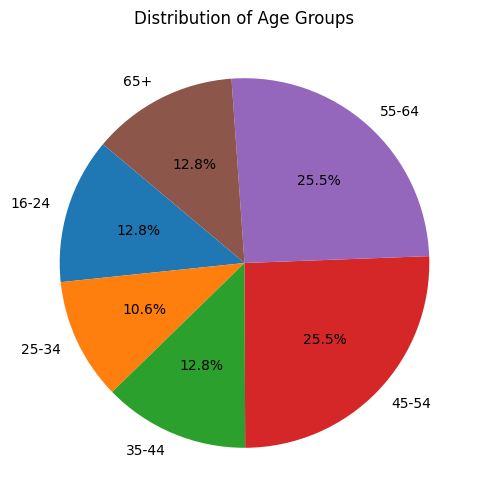

In [3]:
df_age = df_clean['age'].value_counts()

df_age = df_age.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_age, labels=df_age.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Age Groups')

plt.show()

# Majority Hearing Loss

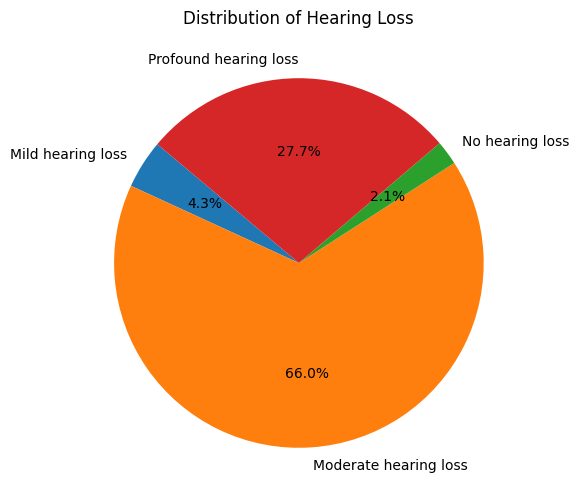

In [5]:
df_hearing = df_clean['hearing_loss'].value_counts()

df_hearing = df_hearing.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_hearing, labels=df_hearing.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Hearing Loss')

plt.show()

# Technology Majority 

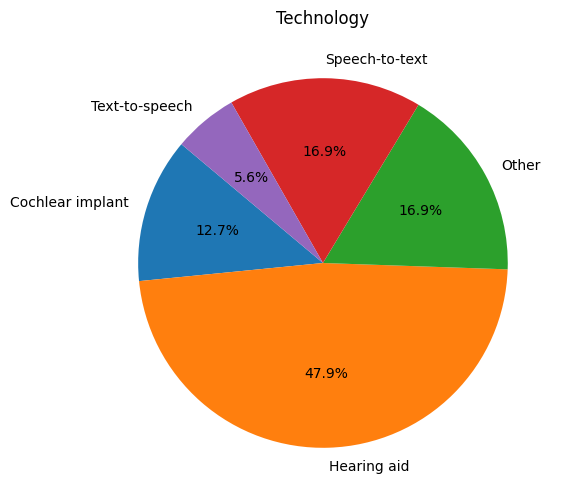

In [6]:
tech = ['Hearing aid','Speech-to-text','Cochlear implant','Other','Text-to-speech']

df_other = df_clean[['ID','tech']]

df_other = (df_other.set_index(['ID'])
             .apply(lambda x: x.str.split(';').explode())
             .reset_index())


df_other = df_other[df_other['tech'] != '']
df_other = df_other['tech']

df_other[~df_other.isin(tech)] = "Other"

df_other = df_other.value_counts()

df_other = df_other.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_other, labels=df_other.index, autopct='%1.1f%%', startangle=140)

plt.title('Technology')

plt.show()

# Other tech

- microphone bluetoothed to Cochlear implant
- Roger On, Roger touchscreen and Roger pass around mic
- Mobile to use notes for communication
- Roger system
- Oticon Connect Clip
- Radio aid, telecoil
- None. Why should I?
- TV to hearing aids via Bluetooth
- BSL
- Loop on TV to listen to audio, also wear around neck in some social circumstances
- Oticon Dongle & TV adapters
- Radioaid

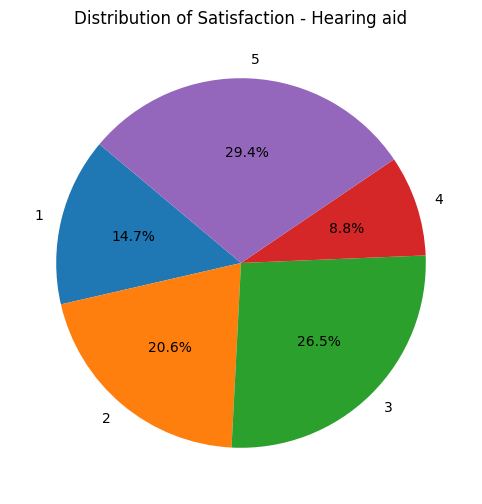

In [137]:
df_tech_hearing_aid = df_clean[df_clean['tech'].str.split(';').apply(lambda x: 'Hearing aid' in x)]

df_satisfaction_counts = df_tech_hearing_aid['satisfaction'].value_counts()

df_satisfaction_counts = df_satisfaction_counts.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_satisfaction_counts, labels=df_satisfaction_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Satisfaction - Hearing aid')
plt.show()


# S-T-T Satisfaction

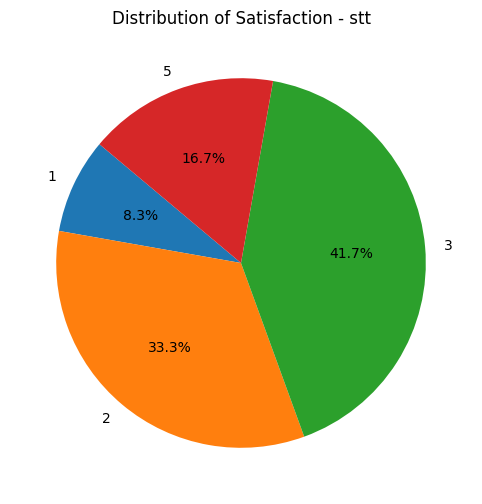

In [138]:
df_tech_STT = df_clean[df_clean['tech'].str.split(';').apply(lambda x: 'Speech-to-text' in x)]

df_satisfaction_counts = df_tech_STT['satisfaction'].value_counts()

df_satisfaction_counts = df_satisfaction_counts.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_satisfaction_counts, labels=df_satisfaction_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Satisfaction - stt')
plt.show()

# T-T-S Satisfaction

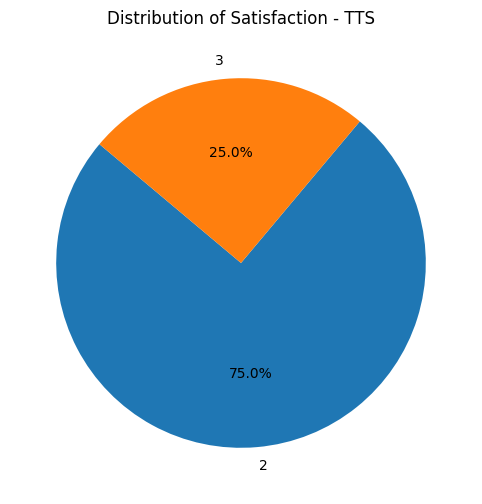

In [139]:
df_tech_TTS = df_clean[df_clean['tech'].str.split(';').apply(lambda x: 'Text-to-speech' in x)]

df_satisfaction_counts = df_tech_TTS['satisfaction'].value_counts()

df_satisfaction_counts = df_satisfaction_counts.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_satisfaction_counts, labels=df_satisfaction_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Satisfaction - TTS')
plt.show()

# Costs

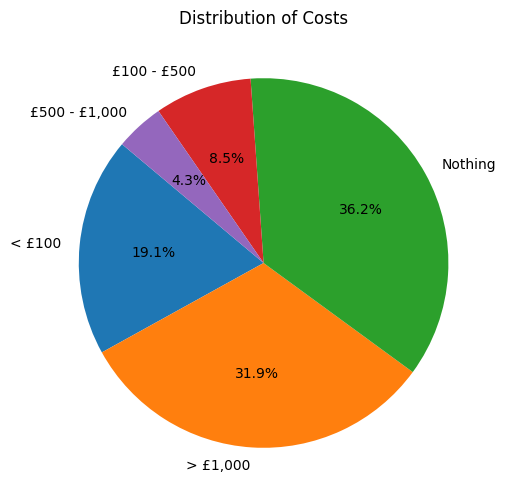

In [100]:
df_cost = df_clean['cost'].value_counts()

df_cost = df_cost.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_cost, labels=df_cost.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Costs')

plt.show()

# Funds

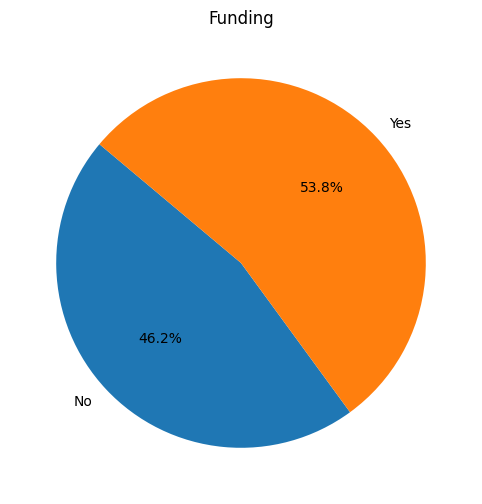

In [118]:
df_funds = df_clean['funds'].value_counts()

df_funds = df_funds.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_funds, labels=df_funds.index, autopct='%1.1f%%', startangle=140)

plt.title('Funding')

plt.show()

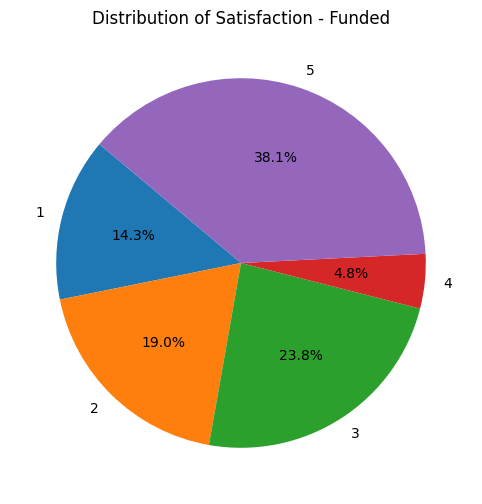

In [128]:
df_funds = df_clean['funds']
df_funded = df_clean[df_funds.isin(["Yes"])]

df_funded = df_funded['satisfaction'].value_counts()

df_funded = df_funded.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_funded, labels=df_funded.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Satisfaction - Funded')

plt.show()

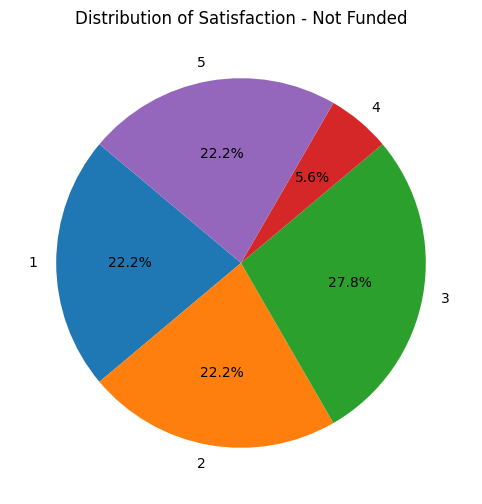

In [129]:
df_funds = df_clean['funds']
df_not_funded = df_clean[df_funds.isin(["No"])]

df_not_funded = df_not_funded['satisfaction'].value_counts()

df_not_funded = df_not_funded.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_not_funded, labels=df_not_funded.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Satisfaction - Not Funded')

plt.show()

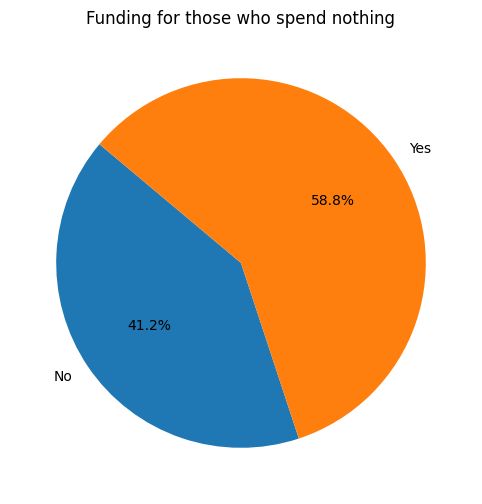

In [122]:
df_cost = df_clean['cost']
df_cost_nothing = df_clean[df_cost.isin(["Nothing"])]

df_cost_nothing = df_cost_nothing['funds'].value_counts()

df_cost_nothing = df_cost_nothing.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_cost_nothing, labels=df_cost_nothing.index, autopct='%1.1f%%', startangle=140)

plt.title('Funding for those who spend nothing')

plt.show()

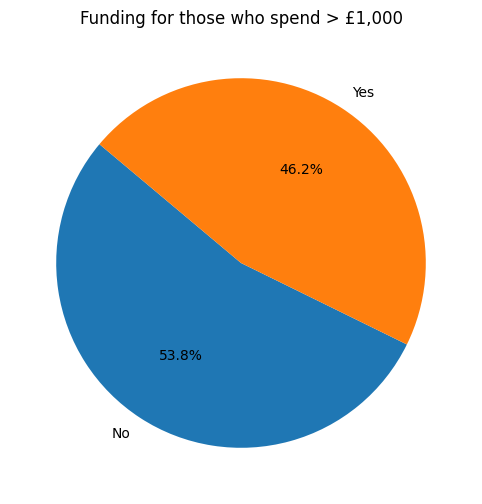

In [9]:
df_cost = df_clean['cost']
df_cost_nothing = df_clean[df_cost.isin(["> £1,000"])]

df_cost_nothing = df_cost_nothing['funds'].value_counts()

df_cost_nothing = df_cost_nothing.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_cost_nothing, labels=df_cost_nothing.index, autopct='%1.1f%%', startangle=140)

plt.title('Funding for those who spend > £1,000')

plt.show()

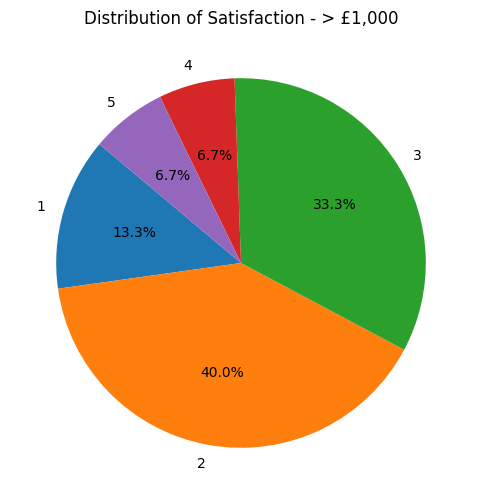

In [7]:
df_cost = df_clean['cost']
df_cost_nothing = df_clean[df_cost.isin(["> £1,000"])]

df_cost_nothing = df_cost_nothing['satisfaction'].value_counts()

df_cost_nothing = df_cost_nothing.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_cost_nothing, labels=df_cost_nothing.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Satisfaction - > £1,000')

plt.show()

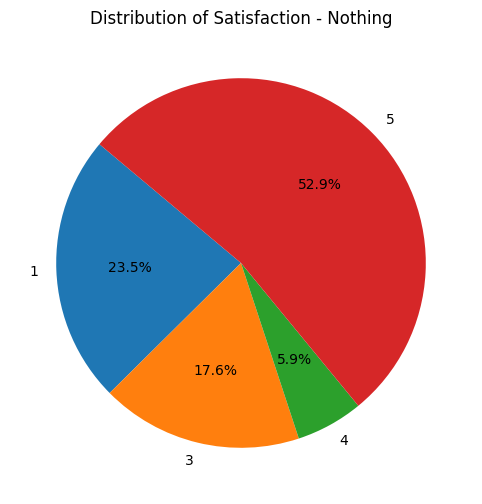

In [13]:
df_cost = df_clean['cost']
df_cost_nothing = df_clean[df_cost.isin(["Nothing"])]

df_cost_nothing = df_cost_nothing['satisfaction'].value_counts()

df_cost_nothing = df_cost_nothing.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_cost_nothing, labels=df_cost_nothing.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Satisfaction - Nothing')

plt.show()

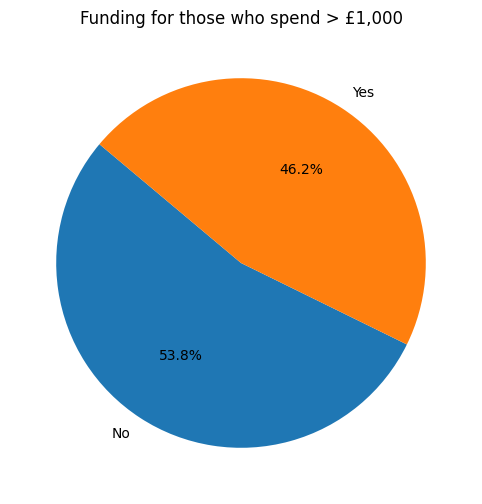

In [120]:
df_cost = df_clean['cost']
df_cost_alot = df_clean[df_cost.isin(["> £1,000"])]

df_cost_alot = df_cost_alot['funds'].value_counts()

df_cost_alot = df_cost_alot.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_cost_alot, labels=df_cost_alot.index, autopct='%1.1f%%', startangle=140)

plt.title('Funding for those who spend > £1,000')

plt.show()

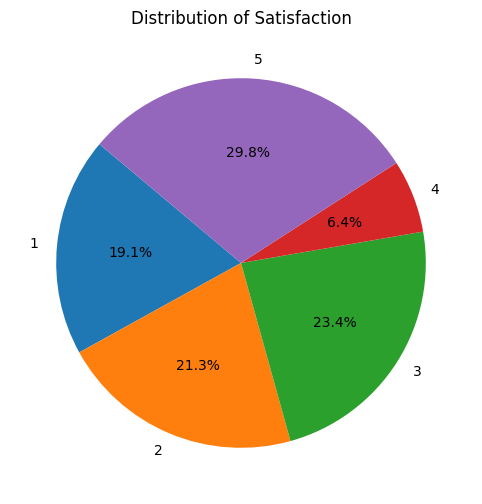

In [11]:
# df_clean['funds'], df_clean['cost']
df_satisfaction = df_clean['satisfaction'].value_counts()

df_satisfaction = df_satisfaction.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_satisfaction, labels=df_satisfaction.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Satisfaction')

plt.show()

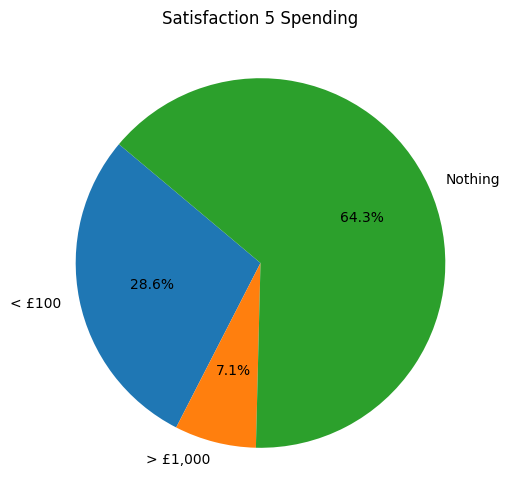

In [105]:
df_satisfaction_5_costs = df_clean[df_clean['satisfaction'] == 5]['cost'].value_counts()

df_satisfaction_5_costs = df_satisfaction_5_costs.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_satisfaction_5_costs, labels=df_satisfaction_5_costs.index, autopct='%1.1f%%', startangle=140)

plt.title('Satisfaction 5 Spending')

plt.show()

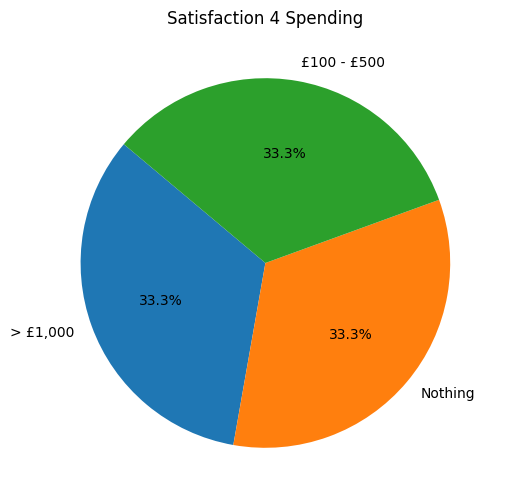

In [106]:
df_satisfaction_4_costs = df_clean[df_clean['satisfaction'] == 4]['cost'].value_counts()

df_satisfaction_4_costs = df_satisfaction_4_costs.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_satisfaction_4_costs, labels=df_satisfaction_4_costs.index, autopct='%1.1f%%', startangle=140)

plt.title('Satisfaction 4 Spending')

plt.show()

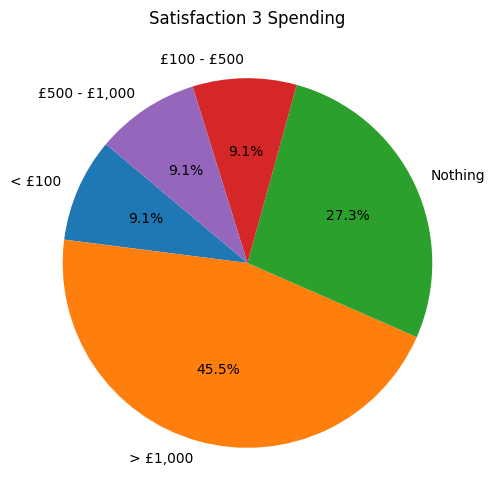

In [107]:
df_satisfaction_3_costs = df_clean[df_clean['satisfaction'] == 3]['cost'].value_counts()

df_satisfaction_3_costs = df_satisfaction_3_costs.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_satisfaction_3_costs, labels=df_satisfaction_3_costs.index, autopct='%1.1f%%', startangle=140)

plt.title('Satisfaction 3 Spending')

plt.show()

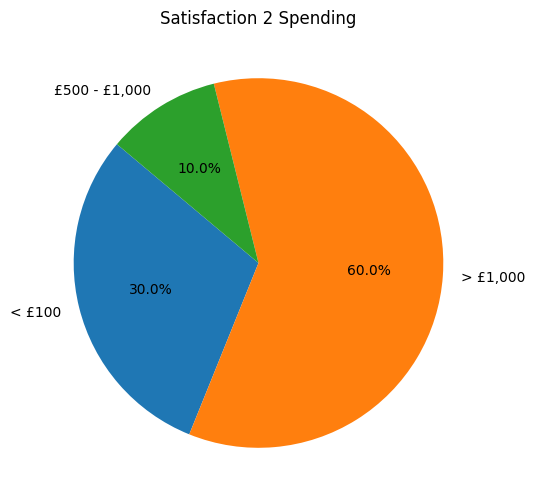

In [108]:
df_satisfaction_2_costs = df_clean[df_clean['satisfaction'] == 2]['cost'].value_counts()

df_satisfaction_2_costs = df_satisfaction_2_costs.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_satisfaction_2_costs, labels=df_satisfaction_2_costs.index, autopct='%1.1f%%', startangle=140)

plt.title('Satisfaction 2 Spending')

plt.show()

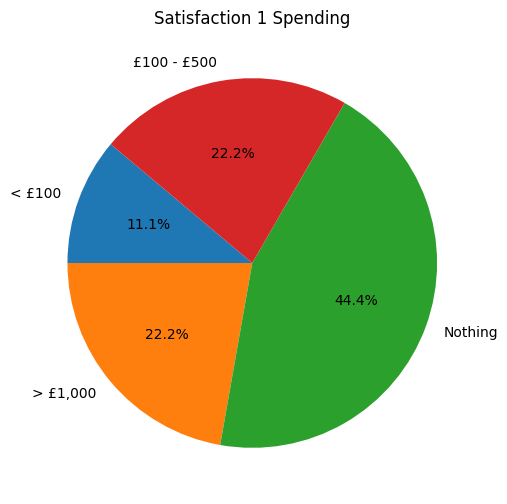

In [109]:
df_satisfaction_1_costs = df_clean[df_clean['satisfaction'] == 1]['cost'].value_counts()

df_satisfaction_1_costs = df_satisfaction_1_costs.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_satisfaction_1_costs, labels=df_satisfaction_1_costs.index, autopct='%1.1f%%', startangle=140)

plt.title('Satisfaction 1 Spending')

plt.show()

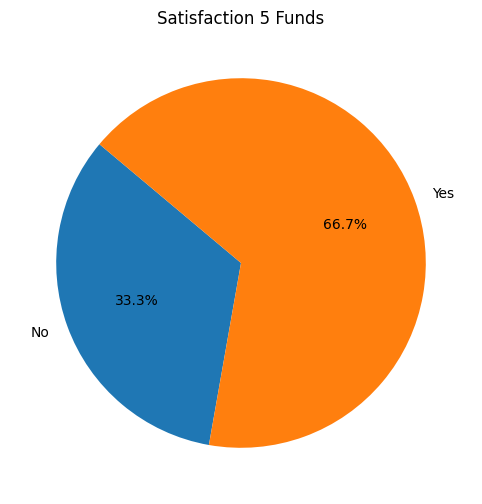

In [110]:
x = df_clean[df_clean['satisfaction'] == 5]['funds'].value_counts()

x = x.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=140)

plt.title('Satisfaction 5 Funds')

plt.show()

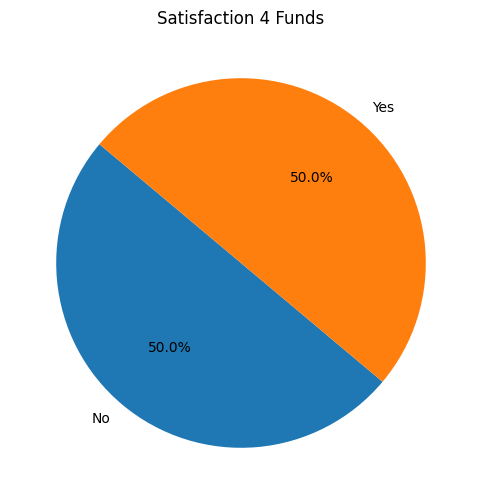

In [111]:
x = df_clean[df_clean['satisfaction'] == 4]['funds'].value_counts()

x = x.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=140)

plt.title('Satisfaction 4 Funds')

plt.show()

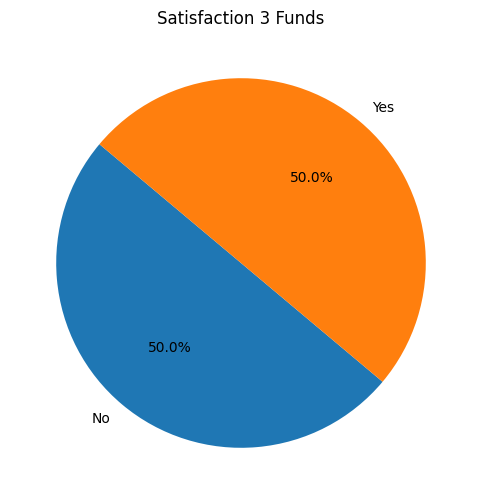

In [112]:
x = df_clean[df_clean['satisfaction'] == 3]['funds'].value_counts()

x = x.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=140)

plt.title('Satisfaction 3 Funds')

plt.show()

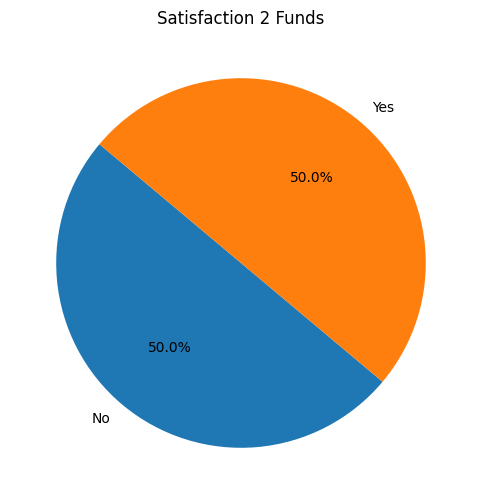

In [113]:
x = df_clean[df_clean['satisfaction'] == 2]['funds'].value_counts()

x = x.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=140)

plt.title('Satisfaction 2 Funds')

plt.show()

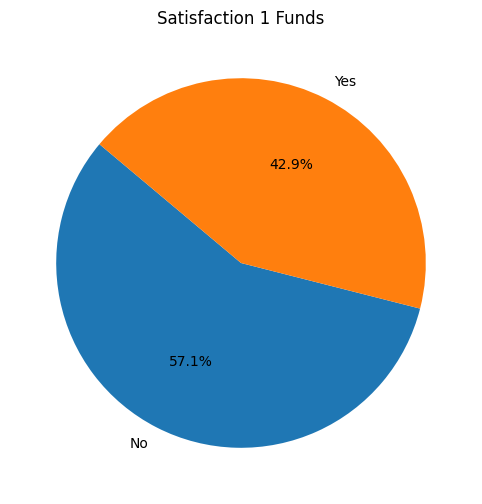

In [114]:
x = df_clean[df_clean['satisfaction'] == 1]['funds'].value_counts()

x = x.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=140)

plt.title('Satisfaction 1 Funds')

plt.show()

## Question 9: What features do you expect in assistive technology?

- Clear sound to hear better -> no whistling or feedback with high pitch noises
- Accurate speech-to-text -> even sound labels (coughing,music,etc.)
- ease of use
- good connectivity 
- discounted/no VAT -> low cost !
- good instructions -> easy to understand -> fitting for all
- long life battery
- subtitles on tv/phone
- voices that are not robotic
- can be adapted to the environment 
- bluetooth on different devices
- expect people to sign 
- AI
- be able to communicate better
- not too big
- sound isolation
- different channels for each enviromment 
- make an app
- waterproof 
- non data information sharing 
- open source/free to use
- control over the settings/programming of my processor


## Question 12: Based on the provided description, what are your thoughts on this product? Does it seem useful? What else could it do?

- small and portable -> smart watch so not restricted use of hands
- be compatible with other technology 
- open source/free to use (e.g. free download)
- sounds too complicated
- emergency siren is useful and other environmental sounds
- needs to be maintained and updated 
- how does it maintin user's data security and privacy
- does amplication work with CI ?
- biggest benefit is to tell who is speaking (maybe live arrow)
- offline functionality 
- Trying to force Deaf people into a hearing society is damaging
- needs to be compatiable with hearing aids 
- worry that speech to text is innacurate or slow
- see it as an enhancement to other additive technologies
- a lot of modern tech allow to connect to phone now (so what is the point)
- consider how this will work in a public, noisy setting
- noise cancelling
- won't be as safe/effective as hearing aids
- Audiologists program hearing aids and Cochlear implants to individuals’ specific loss